# Drive ile bağlantı kurma

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Kütüphanelerin Kurulumu

In [2]:
!pip install -q keras

In [29]:
from tensorflow.keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

In [9]:
model = ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 1s 0us/step


In [10]:
def prepare_image(image,target):
  # giriş görüntüsünü yeniden boyutlandırma ve ön işlemlerin yapılması
  image = image.resize(target)
  image = img_to_array(image)
  image = np.expand_dims(image,axis=0)
  image = imagenet_utils.preprocess_input(image)

  #işlenmiş görüntüyü alma
  return image

*görüntüyü her zaman indirmek zorunda değiliz*

*Sınıflandırmak istediğiniz resmin web adresini aşağıdaki alana giriniz*

In [55]:
#@title Default title text {vertical-output: true}
ImageURL = "https://imgix.bustle.com/uploads/image/2018/4/9/471897e4-4a04-4373-9112-53c381928d89-shutterstock_1064524748.jpg?w=970&h=582&fit=crop&crop=faces&auto=format&q=70\\%22%22%20#@param%20{type:%22string%22}\"" #@param {type : "string"}

*girilen web adresinden resim indirilir*

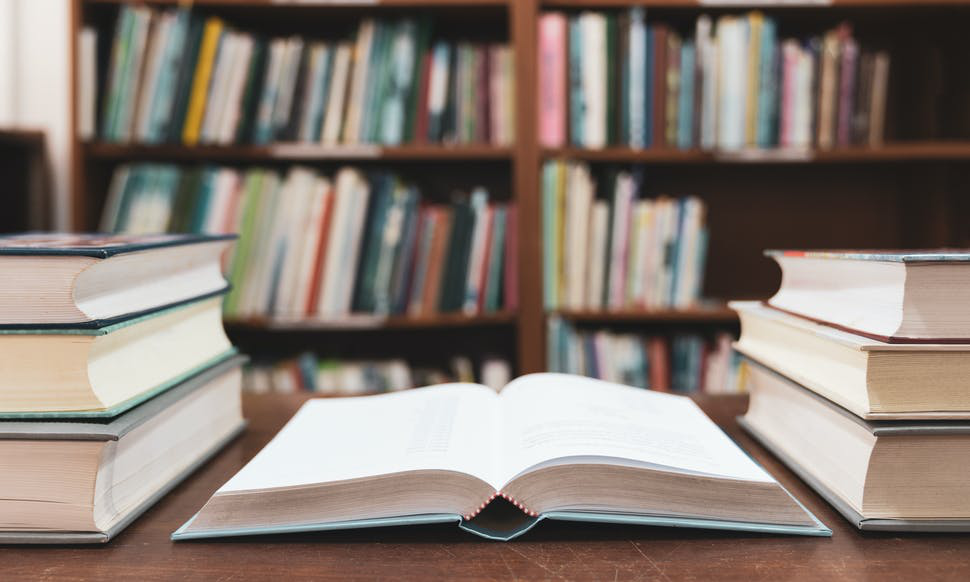

In [56]:
#ImageURL = ""
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

## Eğitilmiş model ile sınıflandırma yapılır

In [41]:
data = {"success": False}
pre_image = prepare_image(image,target=(224,224)) # 224 x 224 boyutlu hale getirilir
preds = model.predict(pre_image) # Kestirim modeline ön işlemeden geçmiş görüntüyü uygula 
results = imagenet_utils.decode_predictions(preds) # kestirim
data["predictions"] = []

for(imagenetID, label, prob) in results[0]: # Imagenet veri kümesinden etiket , olasılık ve kestirim sonucunu al
  r = {"label" : label, "probability" : float(prob)}
  data["predictions"].append(r)

data["success"] = True
print(data)

49152/35363 [=========================================] - 0s 0us/step
{'success': True, 'predictions': [{'label': 'library', 'probability': 0.8199228644371033}, {'label': 'bookshop', 'probability': 0.14281602203845978}, {'label': 'bookcase', 'probability': 0.03473876416683197}, {'label': 'binder', 'probability': 0.0007397293811663985}, {'label': 'book_jacket', 'probability': 0.0002818833163473755}]}


In [46]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dir.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"]))

Sınıflandırma tahmini en yüksek olan 0.8199228644371033 oranıyla library'dir.
